**Nguyễn Tiến Dũng**

KSTN Toán Tin - K62

*20170062*

Đại học Bách khoa Hà Nội

In [49]:
import processviz as pvz
import sympy as sy

sp.init_printing()

**Câu 1:**

*a.* Các trạng thái của con chuột $I = \{sleep, eat, exercise\}$.

Phân phối xác suất tại $n=3$

In [34]:
G1 = pvz.MarkovChain()
G1.from_file('./ass4/input_1.csv')
G1._get_state_vector(3)
G1.state_vector

array([0.884, 0.044, 0.072])

*b.* Như chứng minh trong [assignment 2]() thì ma trận chính quy là ma trận thỏa mãn `irreducible` và `aperiodic`. Dễ thấy ma trận $P$ thỏa mãn cả 2 tính chất này.

Do đó, nếu $P$ có phân phối dừng thì phân phối đó chính là phân phối giới hạn của xích `Markov`

In [29]:
G1.get_steady_state()

array([0.8839779, 0.0441989, 0.0718232])

**Câu 2:** 
*a.* $(X_n)$ là xích Markov, do việc trạng thái chuyển tiếp sang trái hoặc sang phải chỉ quyết định bởi vị trí hiện tại của nó.

*b.* Tìm ma trận chuyển trạng thái

Ma trận chuyển trạng thái được biểu diễn như sau:

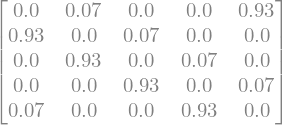

In [50]:
G2 = pvz.MarkovChain()
G2.from_file('./ass4/input_2.csv')
sy.Matrix(G2.data)

Ta thấy chu kì của mỗi trạng thái là 2 nên ma trận trên không là ma trận chính quy, do đó không tồn tại phân phối giới hạn.

**Câu 3:** 

*a.* Ta chứng minh $(Y_n)$ là xích Markov. Ta có: 

$$
P(Y_{n+1} = y_{n+1}|Y_{n} = y_n,...,Y_0 = y_0) = P[(X_{n+1}, X_{n+2}) = (i_{n+1}, i_{n+2})|(X_{n}, X_{n+1}) = (i_{n}, i_{n+1}),...,(X_0, X_1) = (i_0, i_1)]  
= P[X_{n+1} = i_{n+1}, X_{n+2} = i_{n+2}|X_{n+1} = i_{n+1}, X_{n} = i_n,...,X_0 = i_0] = P[X_{n+2}= i_{n+2}|X_{n+1} = i_{n+1}] 
$$

Tương tự, ta có: 

$$
P(Y_{n+1} = y_{n+1}|Y_{n} = y_n) = P[(X_{n+1}, X_{n+2}) = (i_{n+1}, i_{n+2})|(X_{n}, X_{n+1}) = (i_{n}, i_{n+1})] = P[X_{n+2}= i_{n+2}|X_{n+1} = i_{n+1}]
$$

Từ 2 điều trên ta có $(Y_n)$ là xích Markov

**Câu 4:** Về ma trận chính quy thì em đã trình bày trong `câu 5` ở [assignment 2](https://github.com/jurgendn/processviz/blob/connect_state/Assignment2.ipynb) rồi nên ở đây em chỉ nêu lại cách làm chính để kiểm tra ma trận chính quy.

1. *Nếu P không tối giản thì P không phải là ma trận chính quy*
2. *Nếu P có chu kì thì P không phải là ma trận chính quy*

*P chính quy $\leftrightarrow$ `irreducible` + `aperiodic`*

---

Ví dụ, với ma trận $P = [[0,0.07,0,0,0.93],[0.93,0,0.07,0,0],[0,0.93,0,0.07,0],[0,0,0.93,0,0.07],[0.07,0,0,0.93,0]]$, ta có

In [38]:
G41 = pvz.MarkovChain()
G41.from_file('./ass4/input_2.csv')
G41.is_regular()

False

Ma trận trên không chính quy do các trạng thái có chu kì 2

---

Một ví dụ khác, với $P = [[0.9,0.05,0.05],[0.7,0,0.3],[0.8,0,0.2]]$

In [40]:
G42 = pvz.MarkovChain()
G42.from_file('./ass4/input_1.csv')
G42.is_regular()

True

**Câu 5:** 

Phân phối dừng của ma trận chính quy là phân phối `Ergodic`. Do đó để tìm phân phối Ergodic, ta cần kiểm tra ma trận chính quy, rồi sau đó tìm phân phối dừng của ma trận.

Tính chính quy của ma trận có thể được tìm với method `is_regular`:

```python
G.is_regular()
```

`is_regular` gồm có:

1. Kiểm tra tính tối giản qua kiểm tra số thành phần liên thông bằng 1.
`get_connected_component()`
2. Nếu ma trận là tối giản, kiểm tra chu kì
`get_period`

Khi cả 2 điều kiện trên thỏa mãn, kết luận xích có phân phối Ergodic, và là phân phối dừng

In [53]:
G5 = pvz.MarkovChain()
G5.from_file('./ass4/input_1.csv')
if G5.is_regular():
    print(G5.get_steady_state())
else:
    print('Invalid')

[0.8839779 0.0441989 0.0718232]
